In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

In [2]:
# Explore

In [3]:
#plt.rc sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [4]:
df = wrangle_grades()

In [5]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [8]:
## Continuous and Continious

In [9]:
## Continuous and Categorical

In [10]:
## Categorical and Categorical

In [11]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [12]:
## Continuous and Continious

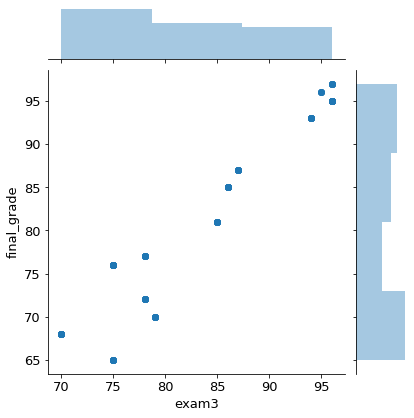

In [13]:
sns.jointplot(x='exam3',y='final_grade', data= train)

Thoughts: Is there a stronger correlation between exams 1 and 3 and final grade compared to exam 2?

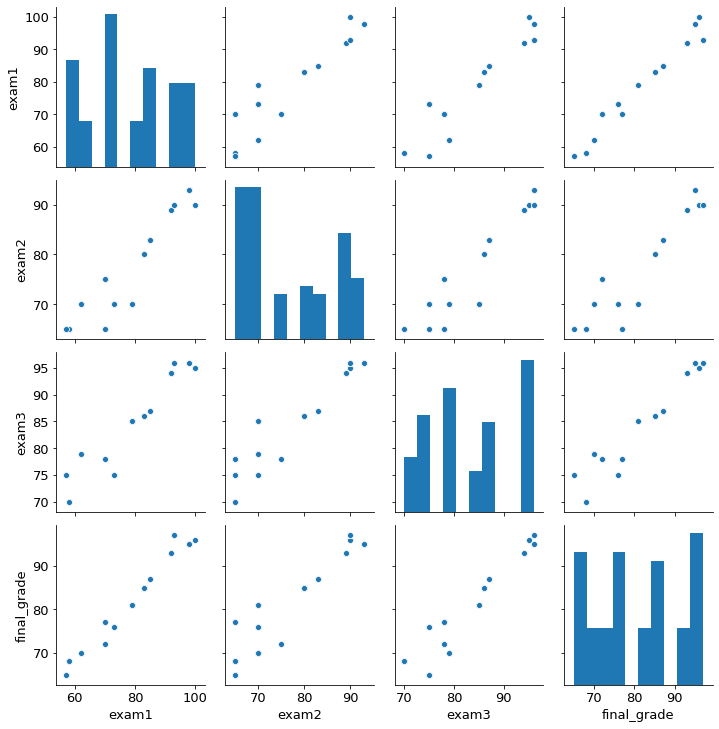

In [14]:
sns.pairplot(train)

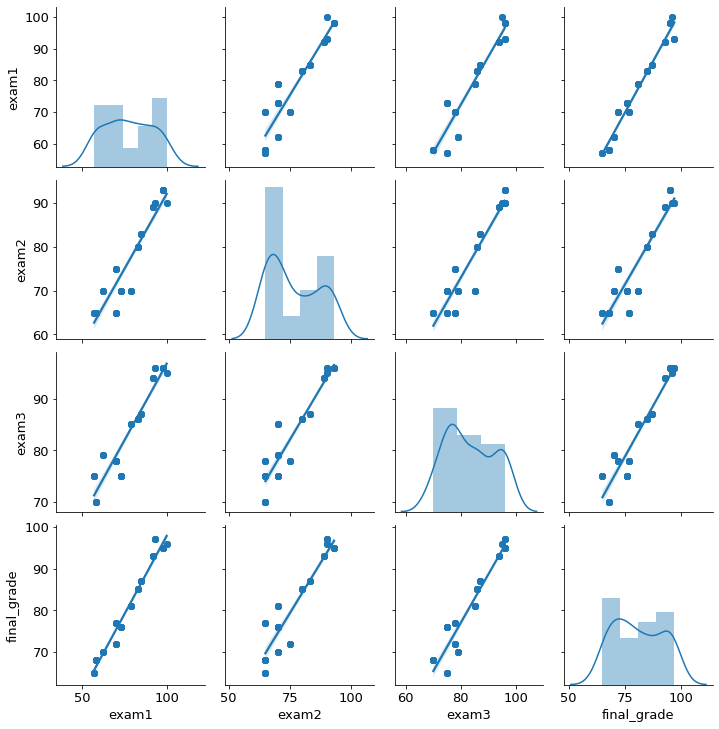

In [15]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [16]:
df.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.933423,0.951743,0.983944
exam2,0.933423,1.000000,0.938773,0.926679
exam3,0.951743,0.938773,1.000000,0.959412
final_grade,0.983944,0.926679,0.959412,1.000000


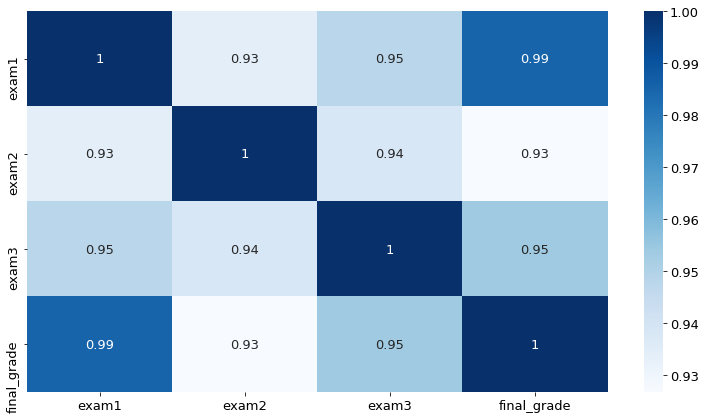

In [17]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways:
    
- exam 2 has the least correlation with final grade

- exam 1 has the highest correlation with final grade

Questions:

- Why does exam 2 have a lower correlation?
    - students are slacking midsemester
    
    - the material covered on the final isn't the         same as what is covered in exam 2
    
    - the material covered midsemester is harder

In [18]:
# Continuous and Categorical

In [19]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [20]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0,70,80,90,105], labels=['D','C','B','A'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz types for continuous x categorical:
    
- boxplot
- bar chart
- violin
- swarmplot


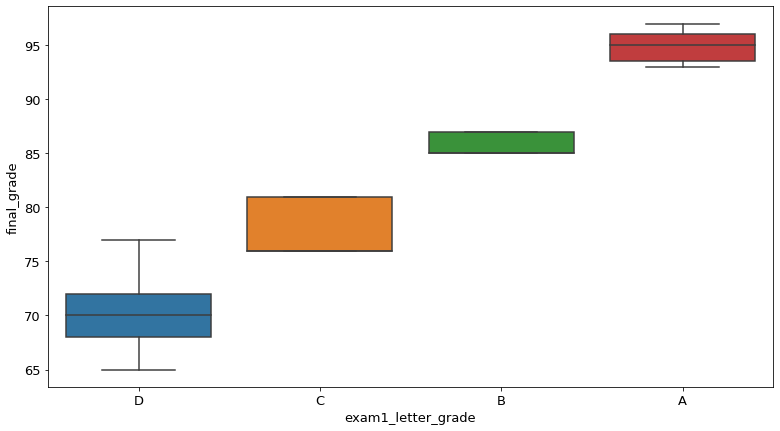

In [22]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Takeaways:
    
- students with Ds not only have the lowest grade, but also the most variation in grades

    - maybe this is due to different study habits or workflows?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

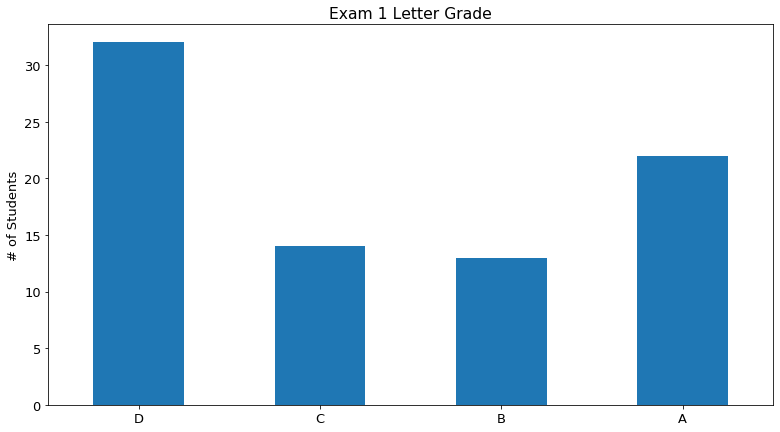

In [23]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grade')
plt.xticks(rotation=0)

Takeaway: there's not significantly fewer observations in the B category, maybe this subgroup is ripe for future research

In [24]:
# make a fake category
np.random.seed(125)
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,Two
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,Two
75,58,65,70,68,D,Two


(0, 100)

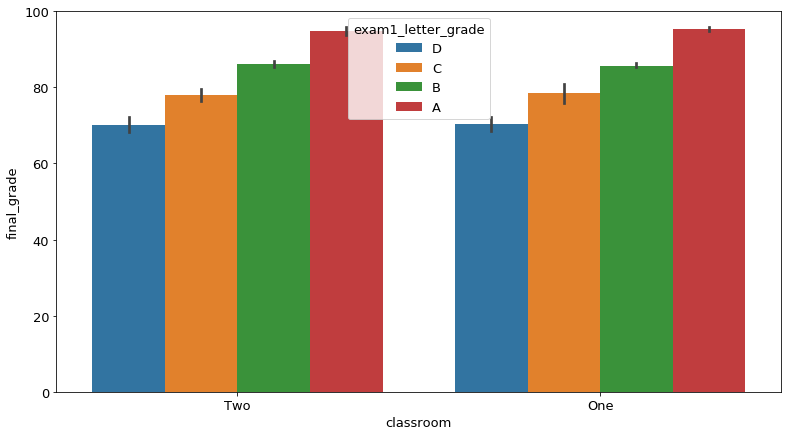

In [25]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0,100)

Takeaway: the distribution of grades in classroom one and two are about the same.
    
Classroom doesn't impact final grade? Let's run a hypothesis test to check.

Null: There is no difference in final grade between classroom one and classroom two
Alternative: There is a signficant difference in final grade between classroom one and classroom two   

In [26]:
from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False,
)

Ttest_indResult(statistic=0.14824815473064099, pvalue=0.8825332594672417)

With a p-value of .025, we reject the null hypothesis that there is no difference in final grade between classroom one and classrom two.

p-value: P(data due to chance | given that null is true)

- takeaways
    - visualize, don't just test
    - statistical significance != business signficance

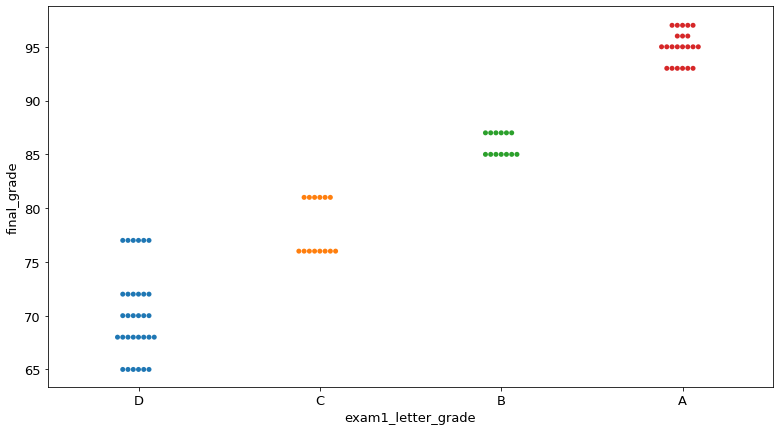

In [27]:
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

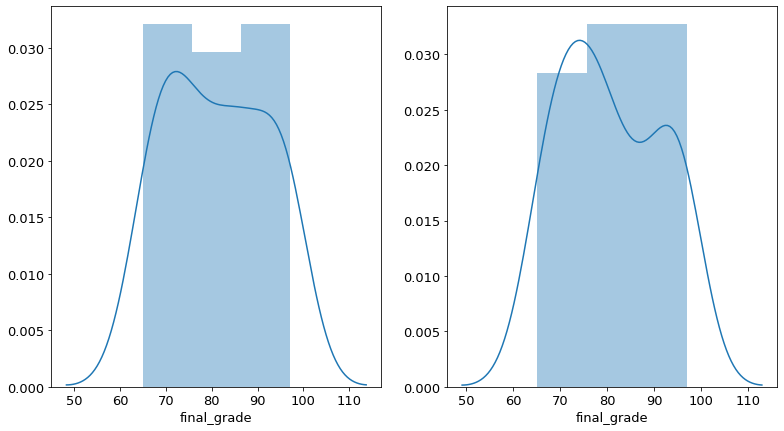

In [28]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

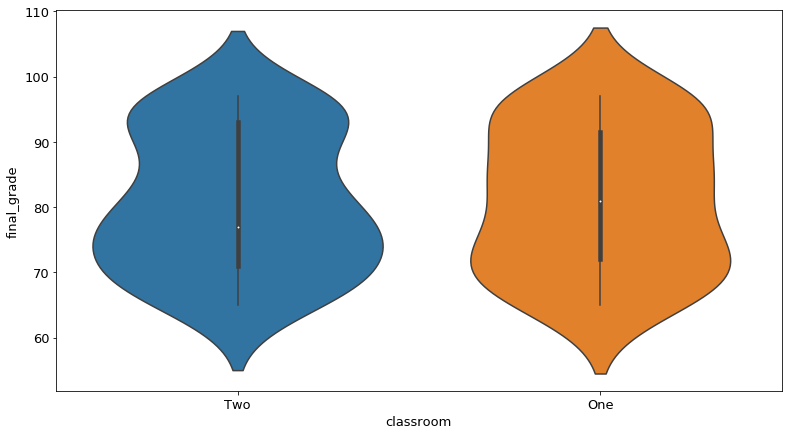

In [29]:
sns.violinplot(data=train, y='final_grade'
               , x='classroom')

In [30]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
D,19.8%,19.8%
C,4.9%,12.3%
B,9.9%,6.2%
A,12.3%,14.8%


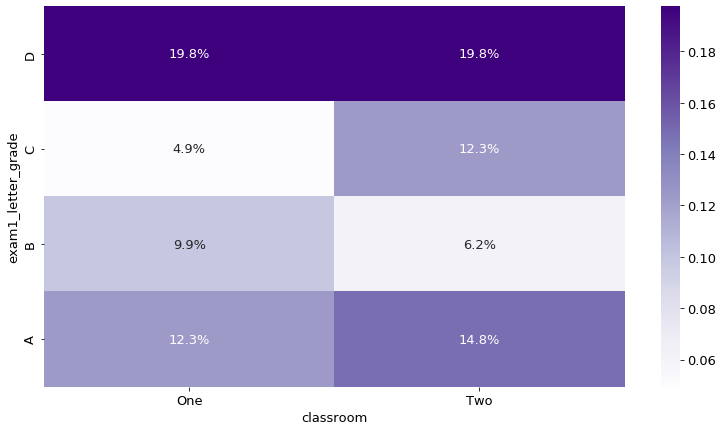

In [31]:
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [32]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns')

exam1_letter_grade,D,C,B,A
classroom,,,,
One,0.5,0.285714,0.615385,0.454545
Two,0.5,0.714286,0.384615,0.545455


- Normalize = true vs normalize = 'columnns' or 'index'
- what percentage of observations fall into the intersection of these categories
- of each subgroup, what percentage of observations fall into the other subgroup
(normalize='columns' or 'index')

In [33]:
import wrangle

In [34]:
df = wrangle.wrangle_telco()

In [35]:
df.head()

,monthly_charges,tenure,Two year,total_charges
1793,90.45,65,1,5879.25
1794,45.20,54,1,2440.80
1795,45.05,56,1,2522.80
1796,39.40,20,1,788.00
1797,85.15,72,1,6130.80


In [36]:
import split_scale

In [37]:
train, validate, test = split_scale.split_my_data(df)

In [38]:
train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((1312, 4), (204, 4), (179, 4))

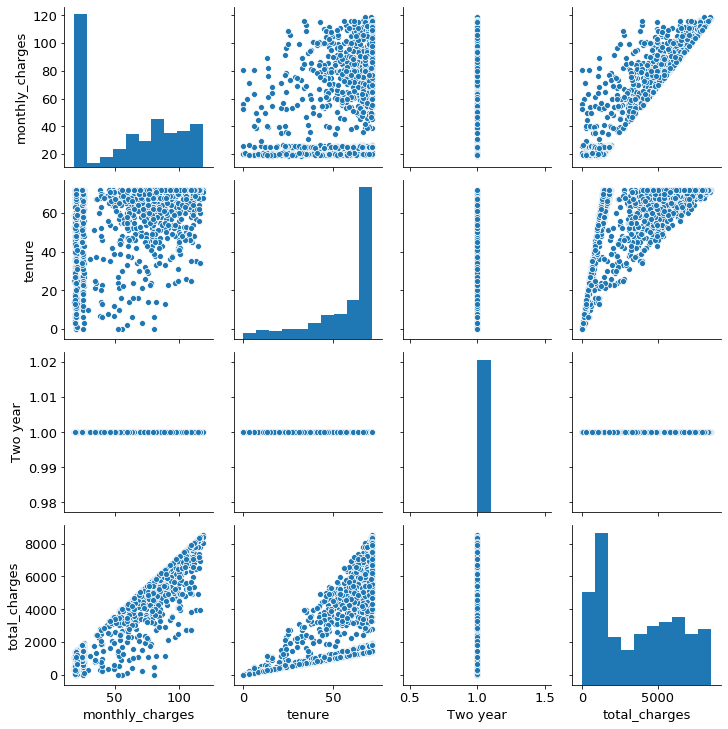

In [39]:
sns.pairplot(train)

In [40]:
import explore

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


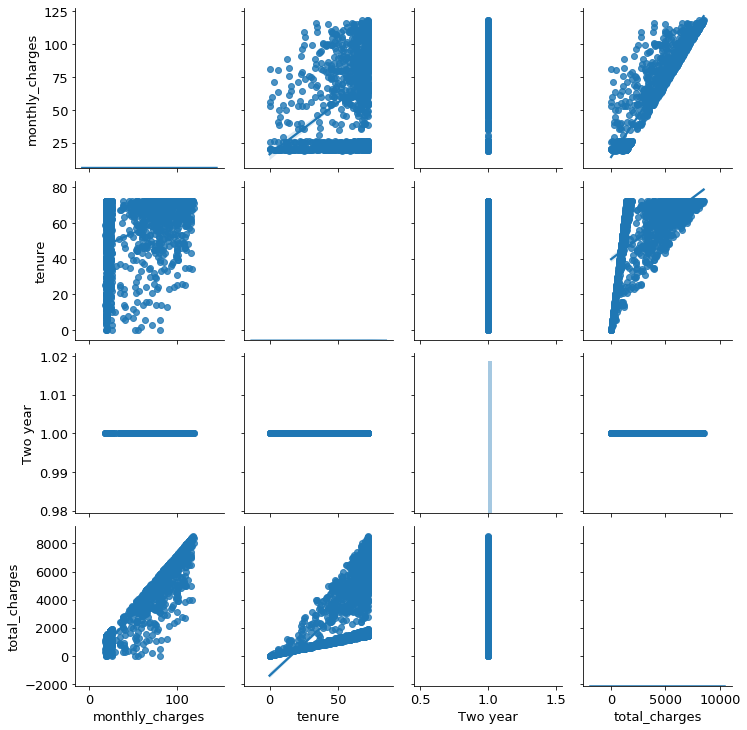

In [41]:
explore.plot_variable_pairs(train)

In [48]:
def months_to_years(tenure_months, df):
    df['tenure_years'] = round(tenure_months / 12, 0)
    return df

In [49]:
months_to_years(train['tenure'], train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,monthly_charges,tenure,Two year,total_charges,tenure_years
6877,18.95,16,1,303.20,1.0
6768,25.10,65,1,1631.50,5.0
5409,104.05,62,1,6451.10,5.0
1935,85.10,55,1,4680.50,5.0
2344,79.10,71,1,5616.10,6.0
...,...,...,...,...,...
6735,20.45,31,1,633.95,3.0
6702,24.45,45,1,1100.25,4.0
7012,20.00,54,1,1080.00,4.0
6676,24.75,72,1,1782.00,6.0


Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots

In [ ]:
# train['tenure_bins'] = pd.cut(train.tenure, bins=[1, 2, 3, 4, 5, 6], labels=['D', 'C', 'B', 'A'])


In [87]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
        plt.rc('figure', figsize=(20, 12))
       
        sns.boxplot(data=df, y=continuous_var, x=categorical_var)
        plt.show()
        sns.barplot(data=df, y=continuous_var, x=categorical_var)
        plt.show()
        sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
        plt.show()

        

    

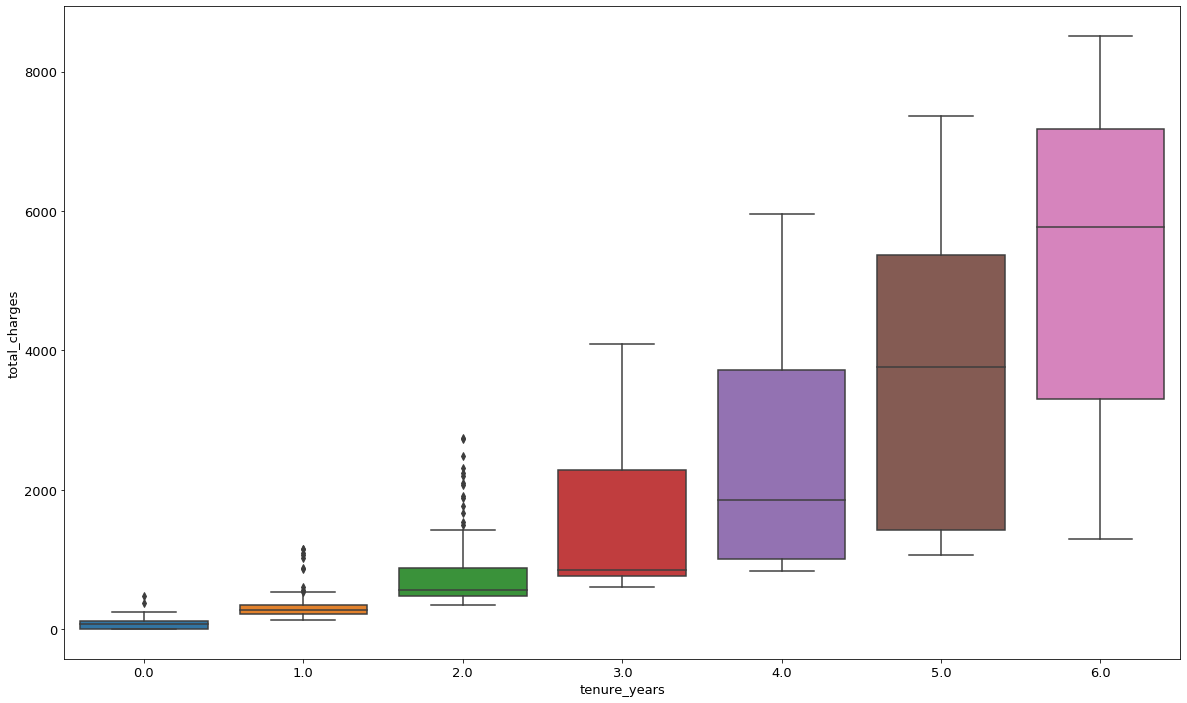

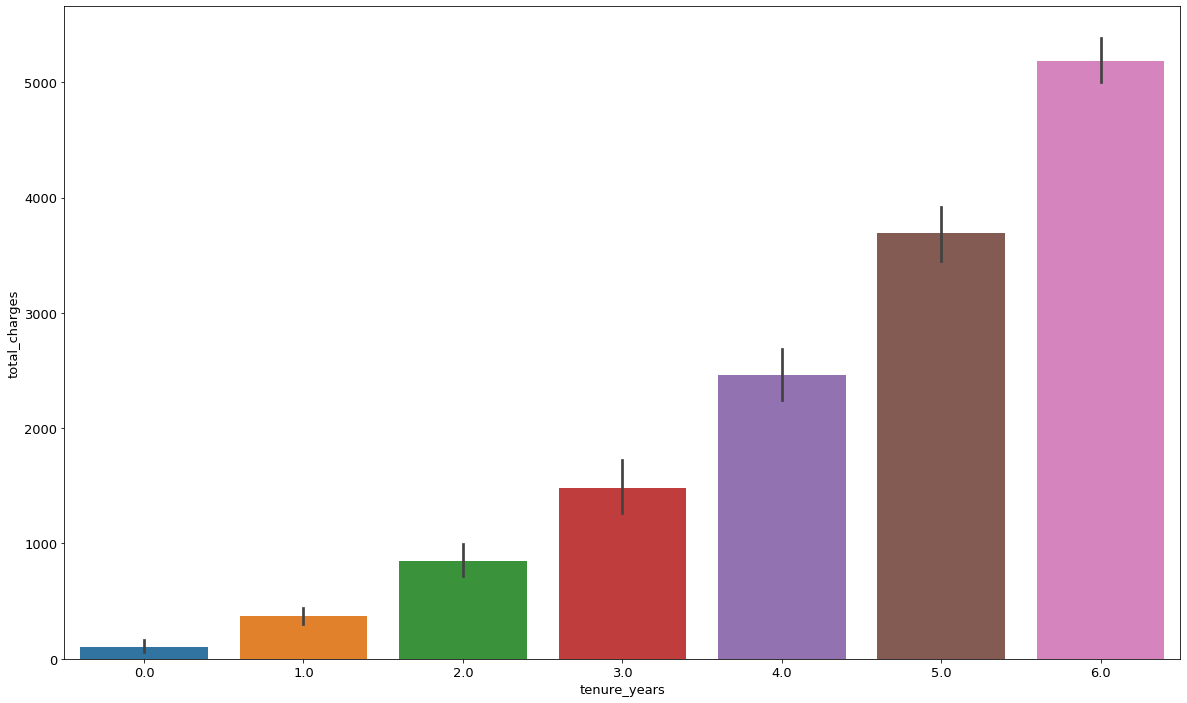

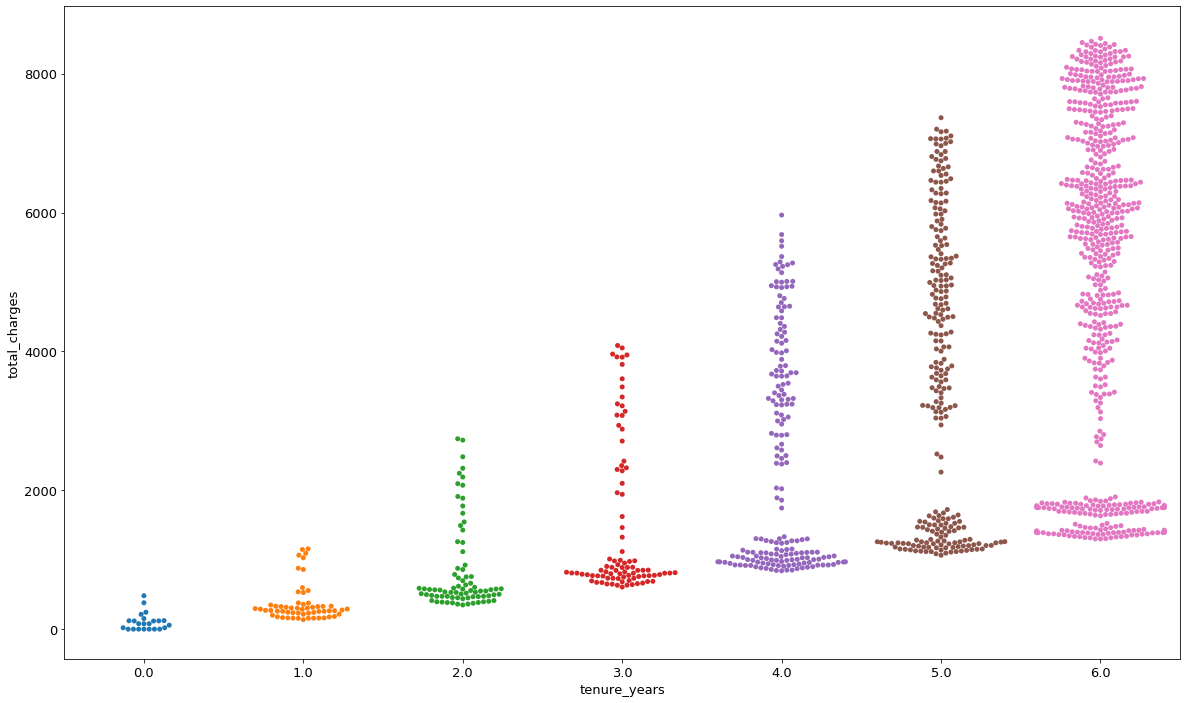

In [88]:
plot_categorical_and_continuous_vars(train.tenure_years, train.total_charges, train)

Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.